## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import autocorrect
import emoji
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading dataset

In [3]:
dd = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Internship 2024 Sample Docs\Reviews_Sentiment analysis Intership project\reviews_badminton\data.csv")

In [4]:
dd

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## EDA

In [5]:
dd.drop(dd[dd['Review text'].isna()].index, inplace=True)

In [6]:
dd.isna().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
dtype: int64

In [7]:
dd.duplicated().sum()

0

In [8]:
dd['Ratings'].value_counts(normalize=True).sort_index()

1    0.090012
2    0.035958
3    0.072268
4    0.204935
5    0.596827
Name: Ratings, dtype: float64

<Axes: >

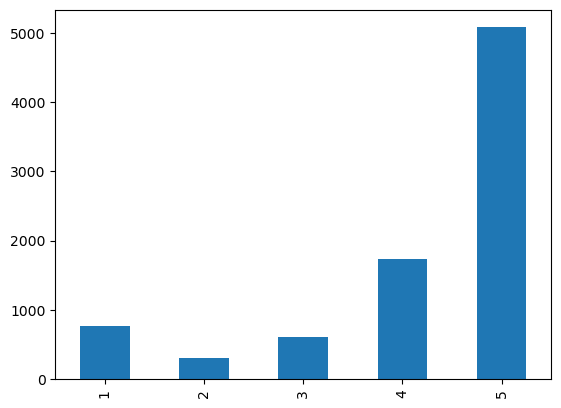

In [9]:
dd['Ratings'].value_counts().sort_index().plot(kind = 'bar')

## Sentiment analysis on text data

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
def sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

In [13]:
dd['Sentiment'] = dd['Review text'].apply(sentiment_nltk)

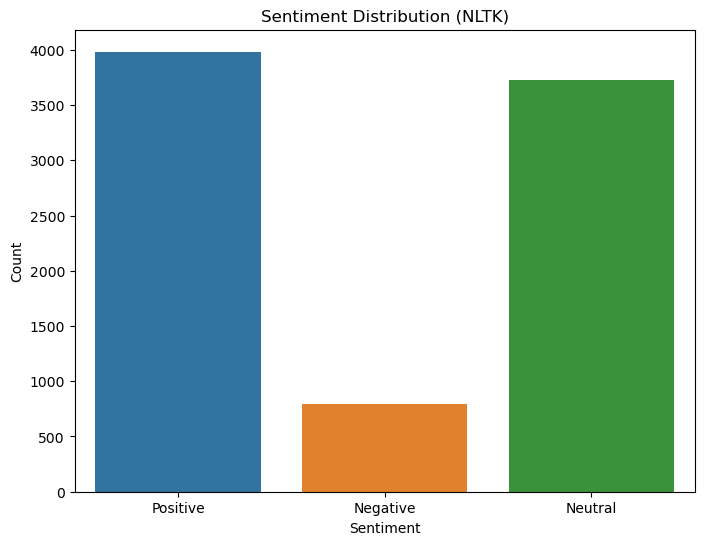

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=dd)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
dd['Sentiment'].value_counts(normalize=True)

Positive    0.468038
Neutral     0.438308
Negative    0.093655
Name: Sentiment, dtype: float64

In [19]:
dd = dd[dd["Sentiment"] != "Neutral"]

dd.shape

(4780, 9)

In [20]:
dd["Sentiment"].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: Sentiment, dtype: float64

In [21]:
dd['Sentiment_num'] = dd['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [23]:
dd.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment,Sentiment_num
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4,Positive,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1,Negative,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Positive,1
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Positive,1


In [24]:
dd = dd[["Review text", "Sentiment_num"]] 
dd.head()

,Review text,Sentiment_num
0,"Nice product, good quality, but price is now r...",1
1,They didn't supplied Yonex Mavis 350. Outside ...,0
2,Worst product. Damaged shuttlecocks packed in ...,0
3,"Quite O. K. , but nowadays the quality of the...",1
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


## Splitting Dataset

In [25]:
x = dd[['Review text']]
y = dd['Sentiment_num']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=33)

## Data Preprocessing

In [27]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens =nltk.word_tokenize(sentence)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

     # Join and return
    return " ".join(filtered_tokens)

In [28]:
from tqdm import tqdm, tqdm_notebook

In [29]:
tqdm.pandas()

In [30]:
x_train = x_train['Review text'].progress_apply(lambda x: preprocess(x))
x_test = x_test['Review text'].progress_apply(lambda x: preprocess(x))

100%|███████████████████████████████████████████████████████████████████████████████| 956/956 [00:01<00:00, 875.29it/s]


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
vector = CountVectorizer(preprocessor=preprocess)

%time x_train_numeric = vector.fit_transform(x_train)

print(x_train_numeric.shape)

CPU times: total: 3.22 s
Wall time: 3.31 s
(3824, 2282)


In [33]:
%time x_test_numeric = vector.transform(x_test)

print(x_test_numeric.shape)

CPU times: total: 891 ms
Wall time: 902 ms
(956, 2282)


In [34]:
from wordcloud import WordCloud

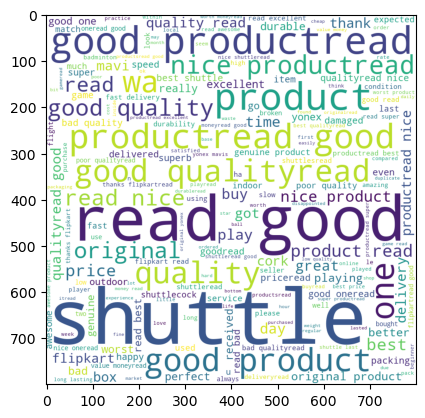

In [35]:
train_text = ' '.join(x_train)

data = WordCloud(height=800,width=800,background_color='white').generate(train_text)
plt.imshow(data)

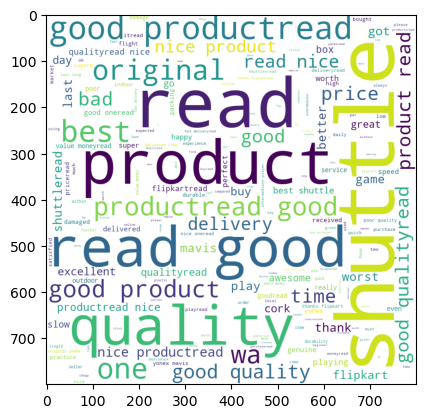

In [36]:
test_text = ' '.join(x_test)

data = WordCloud(height=800,width=800,background_color='white').generate(test_text)
plt.imshow(data)

# Model Building & Evaluation¶

## NaiveBayes

#### Test accuracy

In [60]:
mnb = MultinomialNB()
%time mnb.fit(x_train_numeric,y_train)
y_test_pred = mnb.predict(x_test_numeric)
accuracy_score(y_test, y_test_pred)

CPU times: total: 0 ns
Wall time: 6 ms


0.9382845188284519

#### Train Accuracy

In [61]:
y_train_pred = mnb.predict(x_train_numeric)
accuracy_score(y_train,y_train_pred)

0.9592050209205021

In [63]:
print("Train Score (F1 Score):", f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9757989450822215
Test Score (F1 Score): 0.9634221946683199


## Logistic Regression

#### Test Accuracy

In [64]:
log = LogisticRegression()
%time log.fit(x_train_numeric,y_train)
y_test_pred = log.predict(x_test_numeric)
accuracy_score(y_test, y_test_pred)

CPU times: total: 125 ms
Wall time: 117 ms


0.9341004184100419

In [65]:
confusion_matrix(y_test, y_test_pred)

array([[115,  49],
       [ 14, 778]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

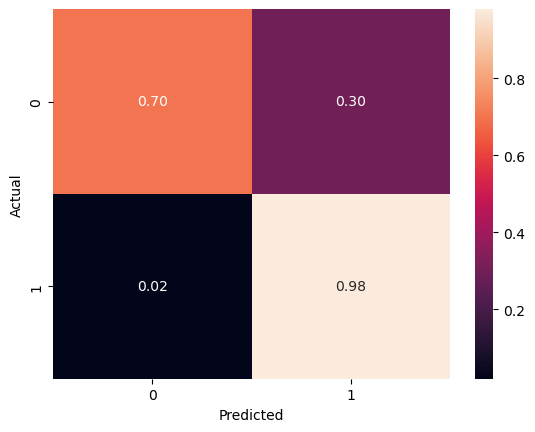

In [66]:
cm = confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Train Accuracy

In [67]:
y_train_pred = log.predict(x_train_numeric)
accuracy_score(y_train,y_train_pred)

0.9696652719665272

In [68]:
confusion_matrix(y_train, y_train_pred)

array([[ 531,  102],
       [  14, 3177]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

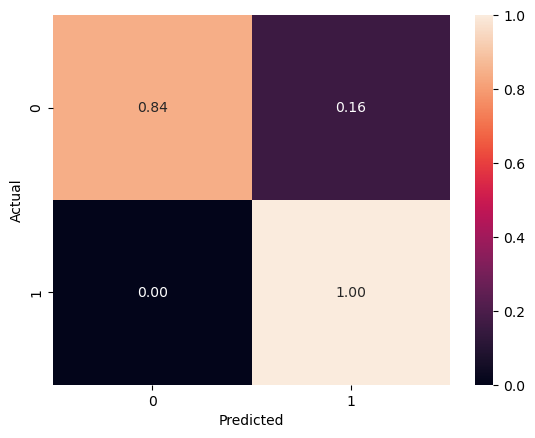

In [69]:
cm = confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [70]:
print("Train Score (F1 Score):", f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9820710973724884
Test Score (F1 Score): 0.9610870907967881


## Decision Tree

#### Test accuracy

In [71]:
dt = DecisionTreeClassifier()
%time dt.fit(x_train_numeric,y_train)
y_test_pred = dt.predict(x_test_numeric)
accuracy_score(y_test, y_test_pred)

CPU times: total: 672 ms
Wall time: 684 ms


0.9236401673640168

#### Train Accuracy

In [72]:
y_train_pred = dt.predict(x_train_numeric)
accuracy_score(y_train,y_train_pred)

0.9968619246861925

In [73]:
print("Train Score (F1 Score):", f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9981220657276996
Test Score (F1 Score): 0.9548546691403834


# Creating an Optimal Workflow

In [75]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [preprocess],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(x_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

# Calculate F1 score on test data
y_test_pred = clf.predict(x_test)
pos_label = 1  # Specify the correct positive label
test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
print('Score on Test Data:', test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 3min 35s
Wall time: 3min 50s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function preprocess at 0x0000027DEAA925C0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data: 0.9670192906036092


In [76]:
import joblib
from joblib import Memory

import os

In [78]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [preprocess],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(x_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

# Calculate F1 score on test data
y_test_pred = clf.predict(x_test)
pos_label = 1  # Specify the correct positive label
test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
print('Score on Test Data:', test_f1_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min 37s
Wall time: 2min 44s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function preprocess at 0x0000027DEAA925C0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data: 0.9670192906036092


In [79]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define pipelines for each algorithm
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                                   verbose=1
                                  )
    %time grid_search.fit(x_train, y_train)

    best_models[algo] = grid_search.best_estimator_

    y_test_pred =grid_search.predict(x_test)
    pos_label = 1  #specify the correct positive lable
    test_f1_score = f1_score(y_test, y_test_pred, pos_label=pos_label)
    print('Score on Test Data: ', test_f1_score)

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 13.2 s
Wall time: 14.1 s
Score on Test Data:  0.9670192906036092
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 59.5 s
Wall time: 1min 4s
Score on Test Data:  0.9565749235474006
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 6min 12s
Wall time: 6min 26s
Score on Test Data:  0.9628229363579079


In [80]:
 for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [82]:
from sklearn import metrics

# Create the directory if it doesn't exist
if not os.path.exists('best_models'):
    os.makedirs('best_models')

for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    # Save the model
    joblib.dump(model, f'best_models/{name}.pkl')

    # Load the model
    model = joblib.load(f'best_models/{name}.pkl')

    # Predict
    %time y_test_pred = model.predict(x_test)

    # Calculate F1 score with correct positive label
    pos_label = 1  # Specify the correct positive label
    test_f1_score = metrics.f1_score(y_test, y_test_pred, pos_label=pos_label)

    print("Test Score (F1):", test_f1_score)

    # Print model size
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 15.3 ms
Test Score (F1): 0.9670192906036092
Model Size: 104502 Bytes
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 17 ms
Test Score (F1): 0.9565749235474006
Model Size: 83116 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 11.1 ms
Test Score (F1): 0.9628229363579079
Model Size: 77561 Bytes
